In [61]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import os

%matplotlib notebook

from ipywidgets import interact #, interactive, fixed, interact_manual
import ipywidgets as widgets

In [62]:
def reform(string):
    return(string.replace('b-pulseAlongX_0.22','UV').replace('z-from_S1_without_pulse','FC_1').replace('m-only_IR_longer_with_nac_2_1','IR_long').replace('_0000',''))

In [63]:
fol = '/home/alessio/k-nokick/'

subfolders = sorted([dir for dir in os.listdir(fol) if os.path.isdir(os.path.join(fol,dir)) and dir not in ['HTML','csv']])
print(''.join(['{} -> {}\n'.format(a,b) for a,b in enumerate(subfolders)]))

0 -> b-pulseAlongX_0.22_0000
1 -> b-pulseAlongX_0.22_short_0_0000
2 -> b-pulseAlongX_0.22_short_pi_0000
3 -> m-only_IR_longer_with_nac_2_1_0000
4 -> m-only_IR_longer_with_nac_2_1_counterClock_0000
5 -> m-only_IR_longer_with_nac_2_1_inverted_phase_0000
6 -> m-only_IR_longer_with_nac_2_1_phase_pi_0000
7 -> m-only_IR_short_with_nac_2_1_0000
8 -> m-only_IR_short_with_nac_2_1_inverted_phase_0000
9 -> m-only_IR_short_with_nac_2_1_phase_pi_0000
10 -> z-from_S1_without_pulse_0000
11 -> z-from_S2_without_pulse_0000



In [66]:
listZ = [3,4,5,6] # only IR
listZ = [0,1,2] # only UV

runs = [subfolders[x] for x in listZ]

def make_dictio_of_data(name,fol):
    '''
    from name to dictio of data
    '''
    csv_fol = os.path.join(fol,'csv')
    file1 = 'Report_' + name + '_populations.csv'
    file2 = 'Report_' + name + '_regions.csv'
    df1 = pd.read_csv(os.path.join(csv_fol,file1))
    df2 = pd.read_csv(os.path.join(csv_fol,file2))
    dic = {'name': name, 'pop' : df1, 'reg' : df2}
    return(dic)

all_data = [make_dictio_of_data(run,fol) for run in runs]
quantity = len(all_data)

<IPython.core.display.Javascript object>


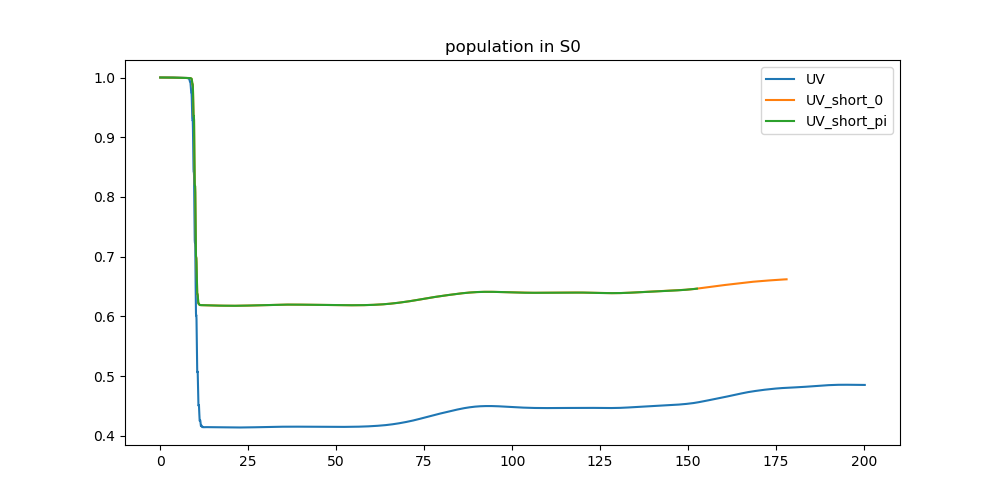

<IPython.core.display.Javascript object>


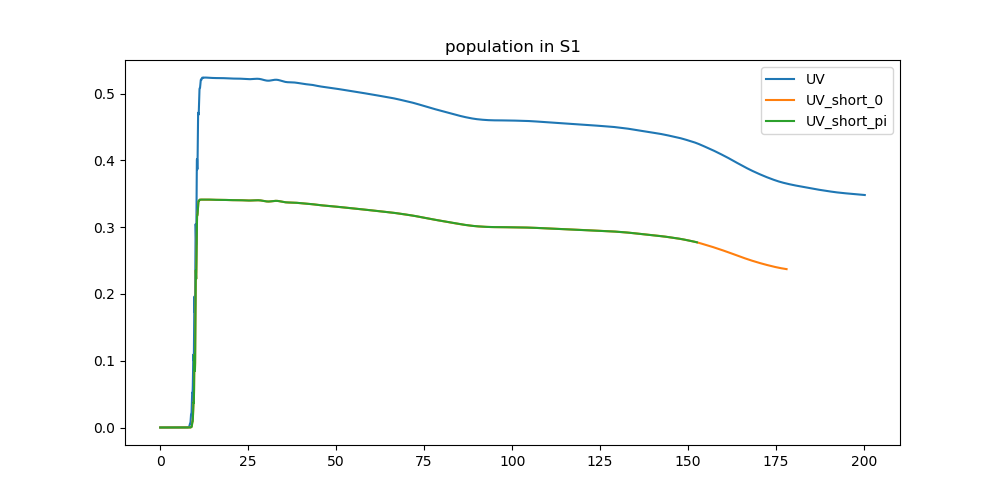

<IPython.core.display.Javascript object>


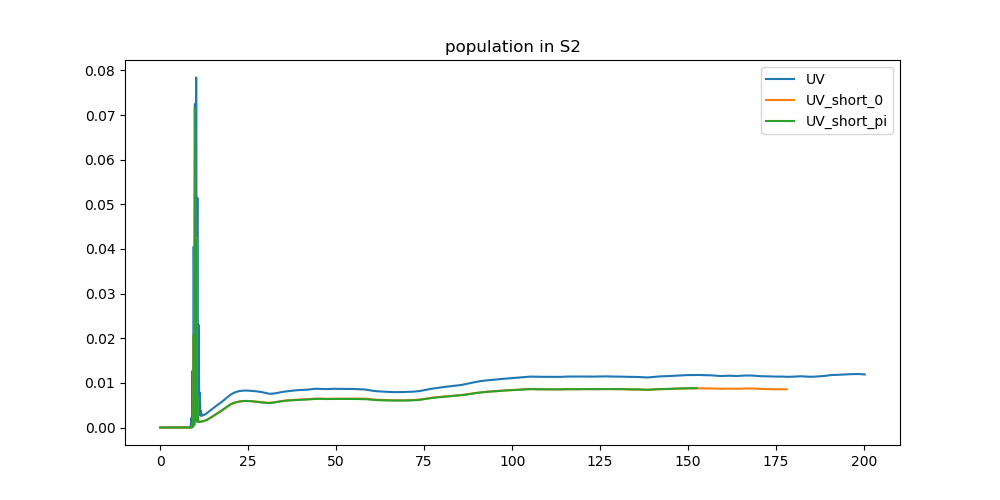

<IPython.core.display.Javascript object>


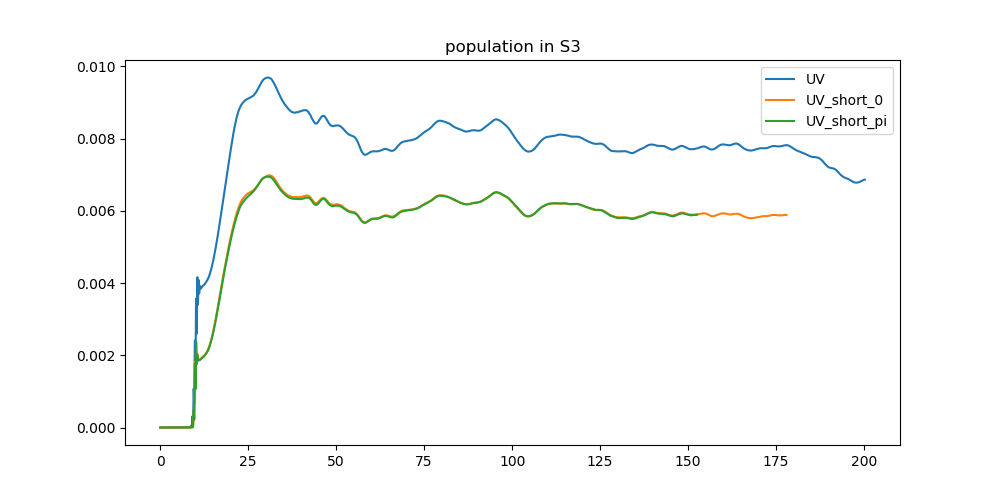

<IPython.core.display.Javascript object>


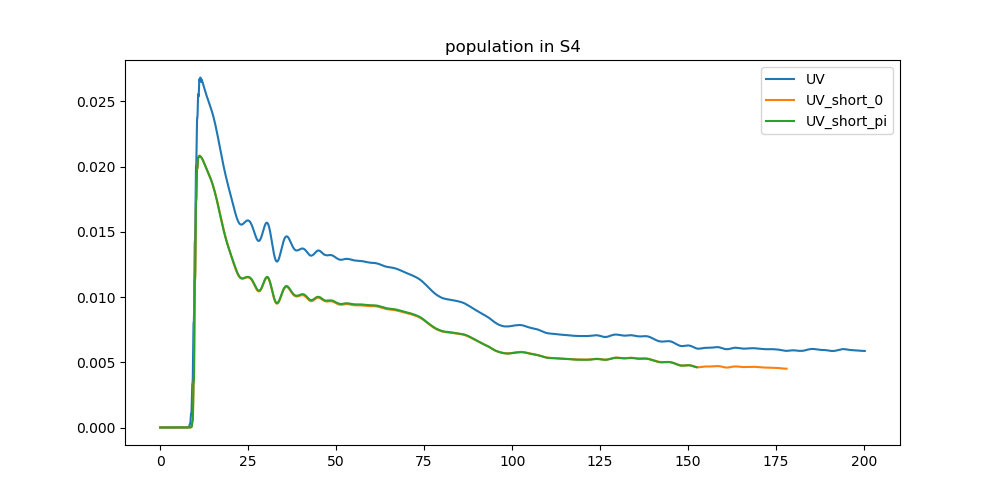

<IPython.core.display.Javascript object>


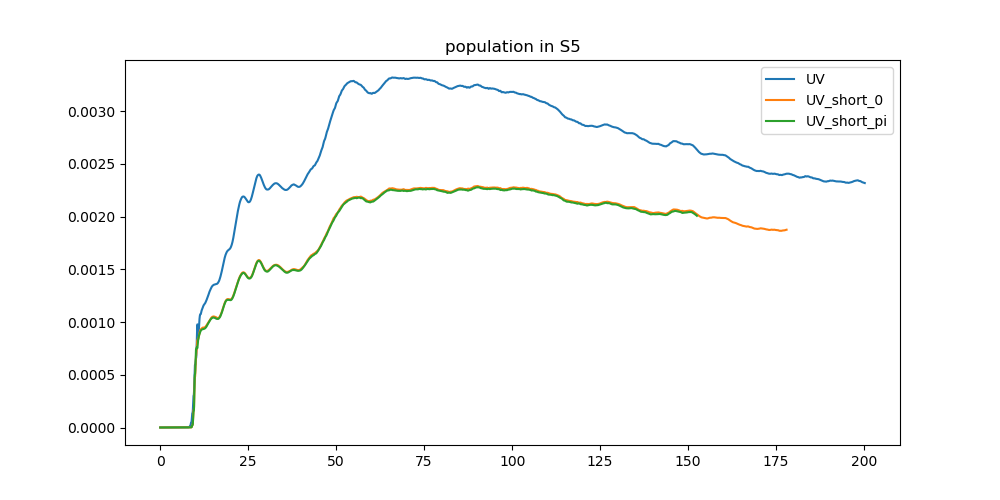

<IPython.core.display.Javascript object>


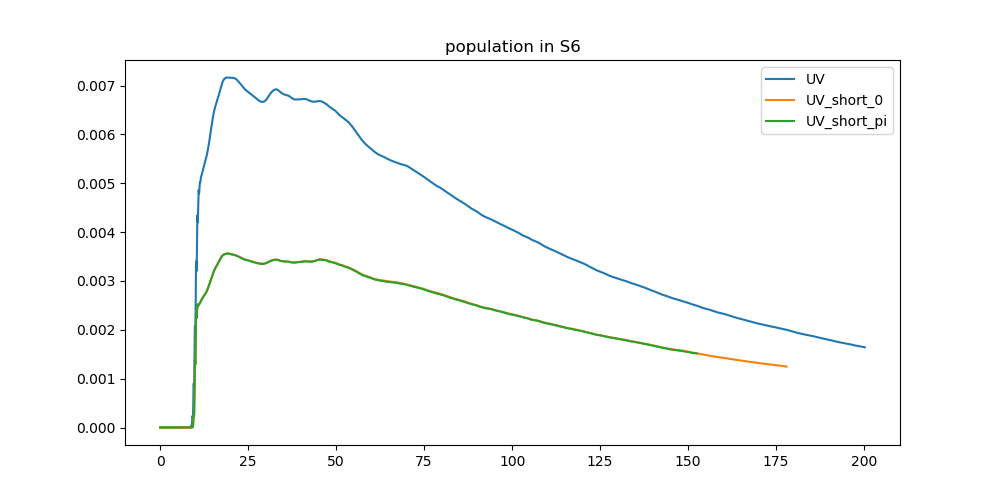

<IPython.core.display.Javascript object>


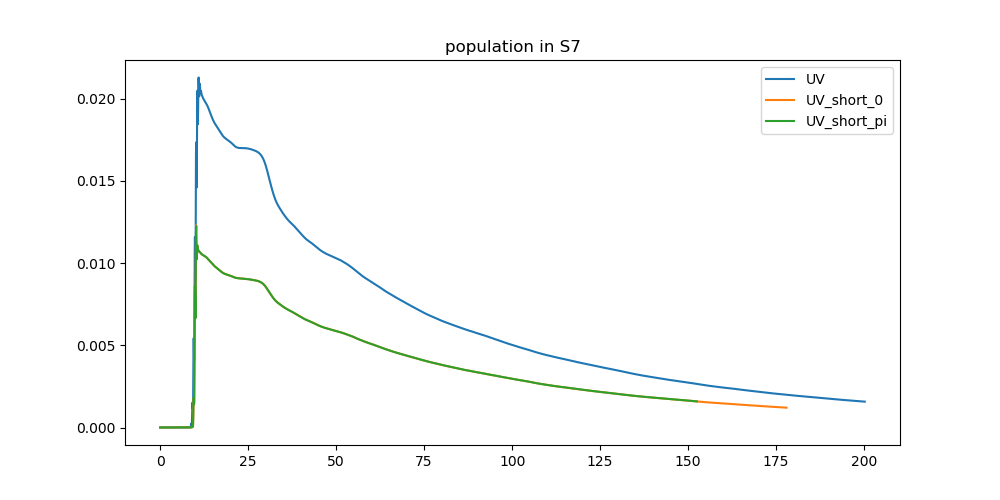

In [67]:
def make_single_state_graph(all_of_them, state):
    fig , ax0 = plt.subplots(1, 1,figsize=(10,5))
    ax0.set_title(r'population in S{}'.format(state-1))
    for run in all_of_them:
        lab = reform(run['name'])
        data_sheet_run = run['pop']
        state_population = data_sheet_run[str(state)]
        state_fs = data_sheet_run['fs']
        ax0.plot(state_fs,state_population,label=lab)
    ax0.legend()    


for i in [1,2,3,4,5,6,7,8]:
    make_single_state_graph(all_data,i)

In [4]:
def calcola2(df_dictio,end_of_pulse_step,end_of_dyns_step,verbose=None):
    verbose = verbose or False
    df = df_dictio['pop']
    label = df_dictio['name']
    time = df.iloc[end_of_pulse_step]['fs']
    time2 = df.iloc[end_of_dyns_step]['fs']
    
    a = df.iloc[[end_of_pulse_step,end_of_dyns_step]]['1']
    da = a.iloc[1] - a.iloc[0]
    b = df.iloc[end_of_pulse_step]['2']
    c = da/b
    total_initial = df.iloc[0]['Total']
    total_final = df.iloc[end_of_dyns_step]['Total']
    total = total_final - total_initial
    
    string = '{}\n\n  time of end pulse -> {:8.3f} fs\n  time of end dyn -> {:8.3f} fs\n  gain in population S0 at the end_step: {:8.5f}\n  S1 population after pulse: {:8.5f}\n  Ratio: {:8.5f}\n  Total = {:6.3f} Hartree\n\n'
        
    if verbose:
        print(string.format(label,time,time2,da,b,c,total))
        
    return da,c

In [68]:

dyn_len = final_frameZ

vector1 = np.empty((dyn_len,quantity))
vector2 = np.empty((dyn_len,quantity))

for final_frame in range(dyn_len):
    result = [ calcola2(single,300,dyn_len,False) for single in all_data ]
    for i in range(quantity):
        this = result[i]

        vector1[final_frame,i] = this[0]
        vector2[final_frame,i] = this[1]


NameError: name 'final_frameZ' is not defined

<IPython.core.display.Javascript object>


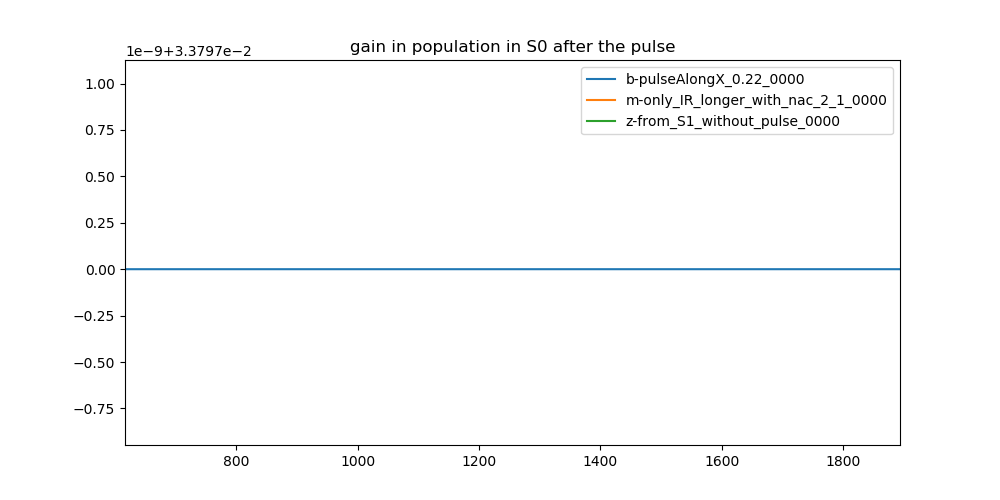

In [21]:

fig , ax0 = plt.subplots(1, 1,figsize=(10,5))
for i in range(quantity):
    lab = all_data[i]['name']
    ax0.plot(vector1[:,i],label=lab)

ax0.set_title('gain in population in S0 after the pulse')    
ax0.set_xlim(300,2000)
ax0.set_ylim(-0.01,0.1)
ax0.legend();



<IPython.core.display.Javascript object>


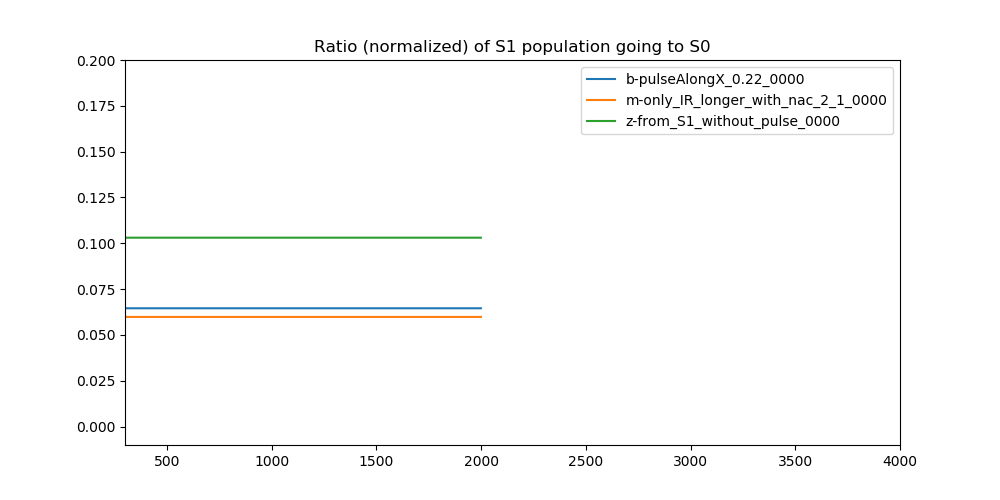

In [19]:

fig , ax0 = plt.subplots(1, 1,figsize=(10,5))
for i in range(quantity):
    lab = all_data[i]['name']
    ax0.plot(vector2[:,i],label=lab)

ax0.set_title('Ratio (normalized) of S1 population going to S0')
ax0.set_xlim(300,4000)
ax0.set_ylim(-0.01,0.2)
    
ax0.legend();

In [17]:
normalize = True

if normalize:
    FC_norm = df6['products'] + df6['reactants']
    IR_norm = df4['products'] + df4['reactants']
    UV_norm = df2['products'] + df2['reactants']
    IR2norm = df8['products'] + df8['reactants']
    IR3norm = df10['products'] + df10['reactants']
else:
    FC_norm,IR_norm,UV_norm = 1.0,1.0,1.0
    
FC_ratio = np.nan_to_num(df6['products']/df6['reactants'])*FC_norm
FC_fs = df6['fs']
IR_ratio = (df4['products']/df4['reactants'])*IR_norm
IR_fs = df4['fs']
IR2ratio = (df8['products']/df8['reactants'])*IR2norm
IR2fs = df8['fs']
IR3ratio = (df10['products']/df10['reactants'])*IR3norm
IR3fs = df10['fs']
UV_ratio = (df2['products']/df2['reactants'])*UV_norm
UV_fs = df2['fs']



IR_ratio.shape, IR2ratio.shape

NameError: name 'df6' is not defined

In [77]:
def figure_of_ratios(list_things):
    fig , [ax0,ax1,ax2] = plt.subplots(3, 1,sharex = True,figsize=(20,30))
    fig.subplots_adjust(hspace=0)

    ax0.plot(FC_fs,np.cumsum(FC_ratio),label='int FC')
    ax0.plot(IR_fs,np.cumsum(IR_ratio),label='int IR')
    ax0.plot(UV_fs,np.cumsum(UV_ratio),label='int UV')
    ax0.plot(IR2fs,np.cumsum(IR2ratio),label='int IR2')
    ax0.plot(IR3fs,np.cumsum(IR3ratio),label='int IR3')
    ax0.set_title('Products/Reactants integral')
    ax0.set_ylabel('sum of ratios')
    ax0.legend()

    ax1.plot(FC_fs,FC_ratio,label='FC')
    ax1.plot(IR_fs,IR_ratio,label='IR')
    ax1.plot(UV_fs,UV_ratio,label='UV')
    ax1.plot(IR2fs,IR2ratio,label='IR2')
    ax1.plot(IR3fs,IR3ratio,label='IR3')
    ax1.set_title('Products/Reactants ratio')
    ax1.set_ylabel('ratio')
    ax1.legend()

    ax2.plot(FC_fs,np.gradient(FC_ratio),label='derivative FC')
    ax2.plot(IR_fs,np.gradient(IR_ratio),label='derivative IR')
    ax2.plot(UV_fs,np.gradient(UV_ratio),label='derivative UV')
    ax2.plot(IR2fs,np.gradient(IR2ratio),label='derivative IR2')
    ax2.plot(IR3fs,np.gradient(IR3ratio),label='derivative IR3')
    ax2.set_xlabel('fs')
    ax2.set_title('Products/Reactants derivative')
    ax2.set_ylabel('Derivative of ratio with time')
    ax2.legend()

    
figure_of_ratios(list_things)

NameError: name 'list_things' is not defined

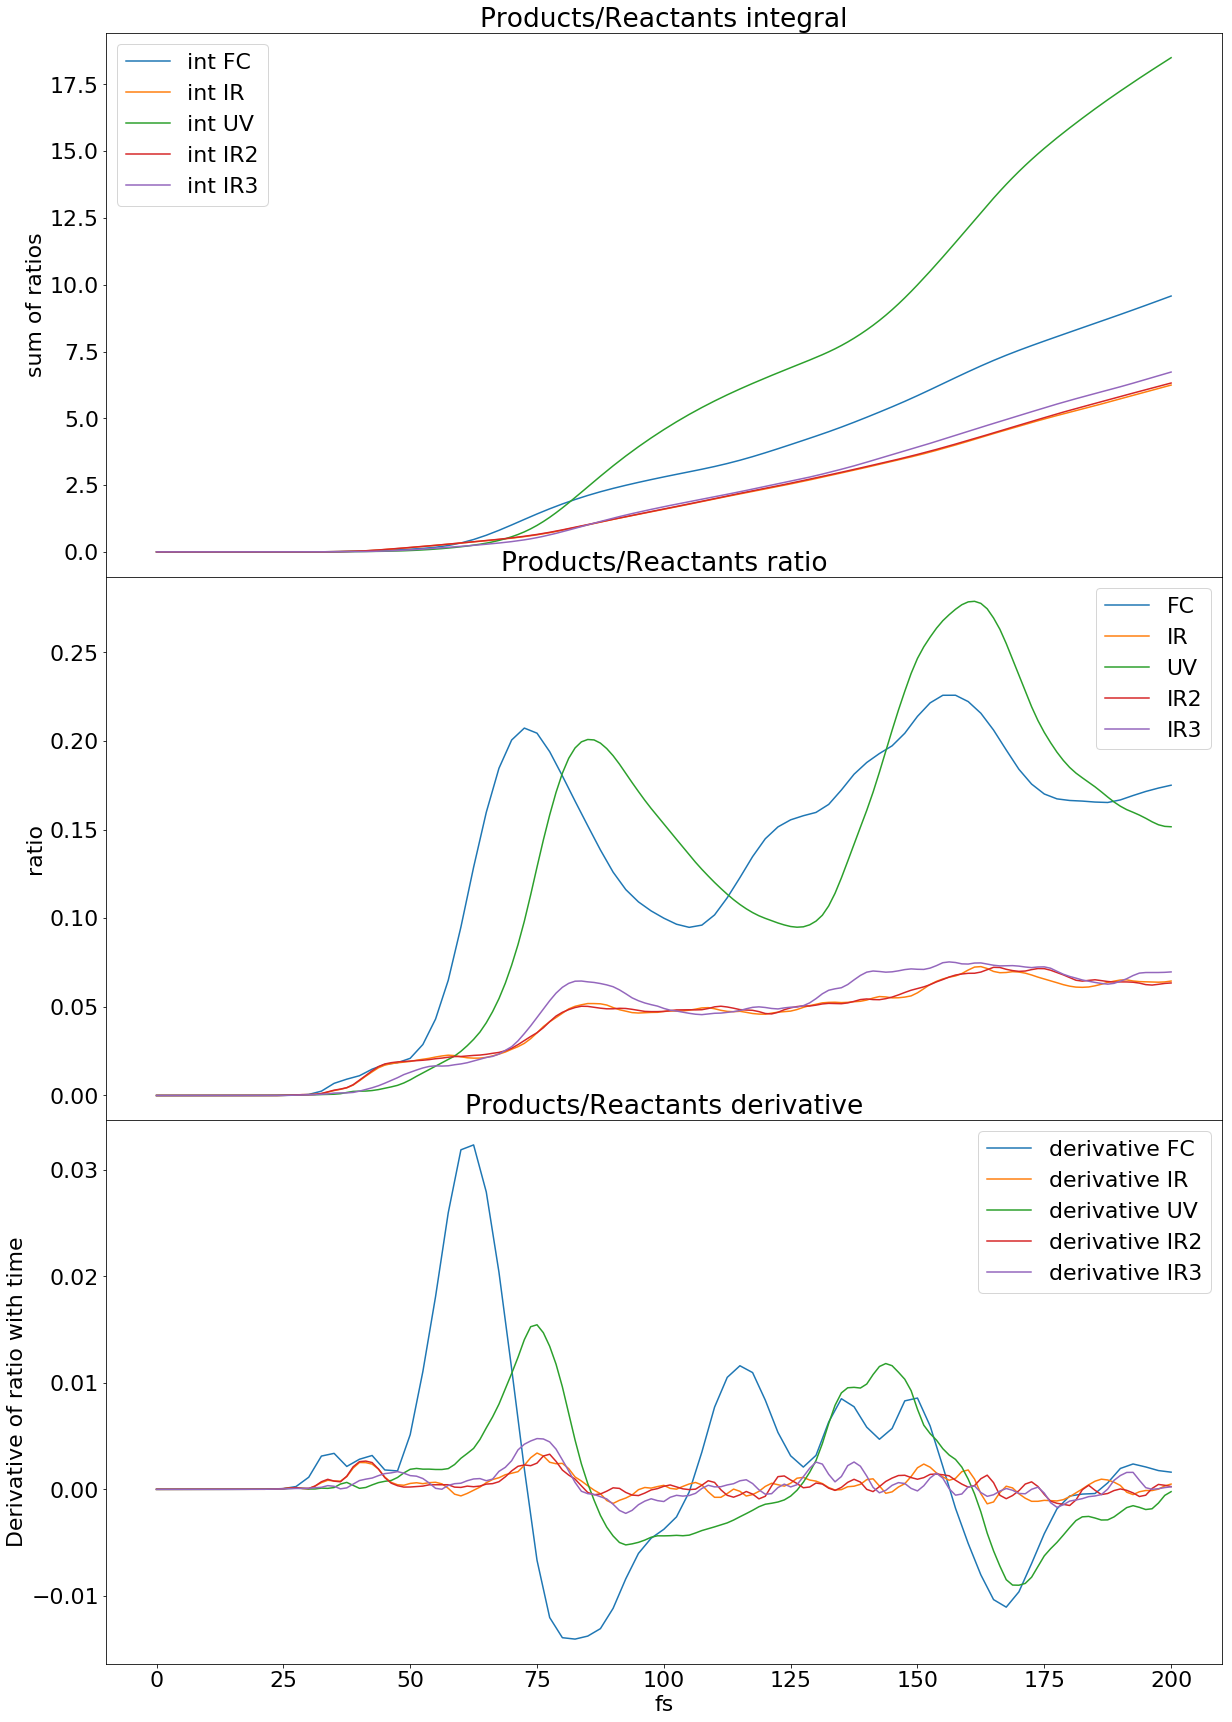

In [78]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

fig , [ax0,ax1,ax2] = plt.subplots(3, 1,sharex = True,figsize=(20,30))
fig.subplots_adjust(hspace=0)

ax0.plot(FC_fs,np.cumsum(FC_ratio),label='int FC')
ax0.plot(IR_fs,np.cumsum(IR_ratio),label='int IR')
ax0.plot(UV_fs,np.cumsum(UV_ratio),label='int UV')
ax0.plot(IR2fs,np.cumsum(IR2ratio),label='int IR2')
ax0.plot(IR3fs,np.cumsum(IR3ratio),label='int IR3')
ax0.set_title('Products/Reactants integral')
ax0.set_ylabel('sum of ratios')
ax0.legend()

ax1.plot(FC_fs,FC_ratio,label='FC')
ax1.plot(IR_fs,IR_ratio,label='IR')
ax1.plot(UV_fs,UV_ratio,label='UV')
ax1.plot(IR2fs,IR2ratio,label='IR2')
ax1.plot(IR3fs,IR3ratio,label='IR3')
ax1.set_title('Products/Reactants ratio')
ax1.set_ylabel('ratio')
ax1.legend()

ax2.plot(FC_fs,np.gradient(FC_ratio),label='derivative FC')
ax2.plot(IR_fs,np.gradient(IR_ratio),label='derivative IR')
ax2.plot(UV_fs,np.gradient(UV_ratio),label='derivative UV')
ax2.plot(IR2fs,np.gradient(IR2ratio),label='derivative IR2')
ax2.plot(IR3fs,np.gradient(IR3ratio),label='derivative IR3')
ax2.set_xlabel('fs')
ax2.set_title('Products/Reactants derivative')
ax2.set_ylabel('Derivative of ratio with time')
ax2.legend()



Text(0.5,0,'fs')

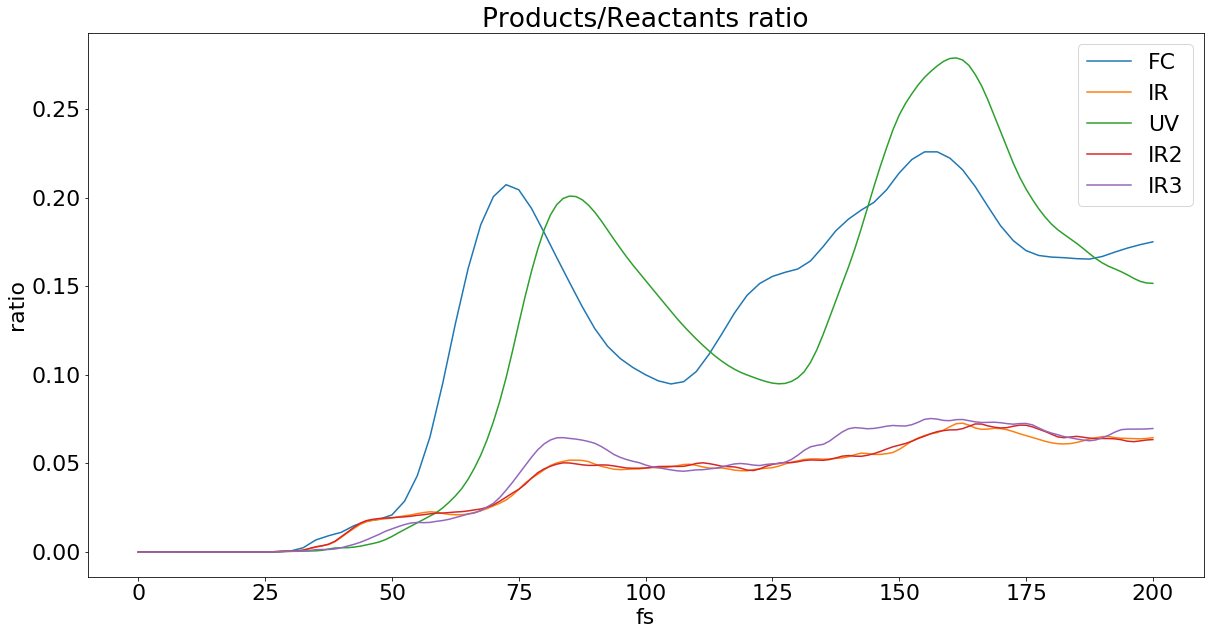

In [45]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

fig , ax1 = plt.subplots(1, 1,sharex = True,figsize=(20,10))
fig.subplots_adjust(hspace=0)

ax1.plot(FC_fs,FC_ratio,label='FC')
ax1.plot(IR_fs,IR_ratio,label='IR')
ax1.plot(UV_fs,UV_ratio,label='UV')
ax1.plot(IR2fs,IR2ratio,label='IR2')
ax1.plot(IR3fs,IR3ratio,label='IR3')
ax1.set_title('Products/Reactants ratio')
ax1.set_ylabel('ratio')
ax1.legend()
ax1.set_xlabel('fs')